<a href="https://colab.research.google.com/github/andrecsq/ad_ufrj/blob/main/chapter_2/26_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício 2.26

**2.26**  In computer security applications, a honeypot is a trap set on a network to detect and counteract computer hackers. Honeypot data are studied in Kimou et al. (2010) using Markov chains. The authors obtain honeypot data from a
central database and observe attacks against four computer ports—80, 135, 139, and 445—over 1 year. The ports are the states of a Markov chain along with a state corresponding to no port is attacked. Weekly data are monitored, and the port most often attacked during the week is recorded. The estimated Markov transition matrix for weekly attacks is

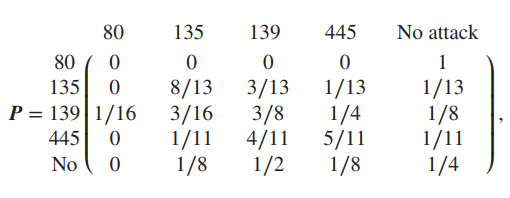

with initial distribution $\alpha = (0,0,0,0,1)$

#### **(a)** Which are the least and most likely attacked ports after 2 weeks?

In [118]:
import numpy as np

In [119]:
P = np.array([[0,0,0,0,1],
              [0,8/13,3/13,1/13,1/13],
              [1/16,3/16,3/8,1/4,1/8],
              [0,1/11,4/11,5/11,1/11],
              [0,1/8,1/2,1/8,1/4]])

Depois de duas semanas, a distribuição é dada por $\alpha P^2$

In [120]:
P2 = np.linalg.matrix_power(P, 2)
alpha = np.array([0.,0,0,0,1])
aP2 = alpha@P2

print("Probabilities after 2 weeks:")
print(aP2)

Probabilities after 2 weeks:
[0.03125 0.21329 0.3868  0.22268 0.14598]


In [121]:
port_names = ["80","135","139","445","None"]
min_port_idx = np.argmin(aP2)
max_port_idx = np.argmax(aP2)

print("Least likely attacked port:")
print(f'Port {port_names[min_port_idx]} with probability {round(aP2[min_port_idx]*100, 3)}%\n')
print("Most likely attacked port:")
print(f'Port {port_names[max_port_idx]} with probability {round(aP2[max_port_idx]*100, 3)}%')

Least likely attacked port:
Port 80 with probability 3.125%

Most likely attacked port:
Port 139 with probability 38.68%


#### **(b)** Find the long-term distribution of attacked ports.

Usamos como base $P^{100}$ para o cálculo. Checamos se as linhas são iguais:

In [122]:
# Para suprimir a notação científica e as muitas casas decimais
np.set_printoptions(precision=5, suppress=True)

P100 = np.linalg.matrix_power(P, 100)
print(P100)

[[0.02147 0.26693 0.34347 0.22733 0.1408 ]
 [0.02147 0.26693 0.34347 0.22733 0.1408 ]
 [0.02147 0.26693 0.34347 0.22733 0.1408 ]
 [0.02147 0.26693 0.34347 0.22733 0.1408 ]
 [0.02147 0.26693 0.34347 0.22733 0.1408 ]]


Como são iguais podemos prosseguir. A distribuição a longo prazo é dada por:

In [123]:
sz = P.shape[0]

print("Long-term probabilities:")
for i in range(sz):
  print(f"Port {port_names[i]}: {round(P100[0][i]*100, 3)}%")

Long-term probabilities:
Port 80: 2.147%
Port 135: 26.693%
Port 139: 34.347%
Port 445: 22.733%
Port None: 14.08%


## Exercício 2.27

See gamblersruin.R. Simulate gambler’s ruin for a gambler with initial stake $2, playing a fair game.

Adaptado da minha implementação para o exercício 1.35, em Python.



In [124]:
import numpy as np

In [125]:
# Simulation functions.
# To use:
# - Call simulate_games(initial_balance, p, n, max) and save the list trials
# - Call print_report_prob(trials, balance, p, max) to get statistics on the trials

# Returns True for ruin
def simulate_game(initial_balance, p, max):
    balance = initial_balance
    while 0 < balance and balance < max:
        p1_win = np.random.random() < p
        balance += 1. if p1_win else -1.
    return True if balance == 0 else False

def simulate_games(initial_balance, p, n, max=100):
    n = int(n)
    trials = np.zeros(n)
    for i in range(n):
        trials[i] = simulate_game(initial_balance, p, max)
    return trials

def print_report_prob(trials, balance, p, max):
    prob_simulation = trials.mean()
    var_simulation = trials.var()

    print()
    
    print("_____Simulation______")
    print(f"Prob of ruin: {round(prob_simulation, 3)}")
    print(f"Var(Prob): {round(var_simulation, 3)}")
    upper_lim = prob_simulation + 1.96 * np.sqrt(var_simulation) / np.sqrt(len(trials))
    lower_lim = prob_simulation - 1.96 * np.sqrt(var_simulation) / np.sqrt(len(trials))    
    print(f"Confidence interval: [{round(upper_lim, 3)},{round(lower_lim, 3)}]")

    print()

    print("_______Formula_______")
    q = 1-p
    prob_exact = 1 - balance/max if p == 1/2 else 1 - (1-(q/p)**balance)/(1-(q/p)**max)
    print(f"Prob of ruin: {prob_exact}")
    print(f"Error: {round(abs(prob_exact-prob_simulation), 5)}")
    exact_inside_interval = lower_lim < prob_exact and prob_exact < upper_lim
    print(f"P(X) exact is {'INSIDE' if exact_inside_interval else 'OUTSIDE'} the confidence interval")

#### **(a)** Estimate the probability that the gambler is ruined before he wins $*5*

In [126]:
# Parameters
p_fair = 0.50
max = 5
balance = 2
n = 100

In [127]:
trials = simulate_games(balance, p_fair, n, max)
print("Trials:")
print(trials)

Trials:
[0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1.]


In [128]:
print(f"Probability of RUIN with p = {p_fair}")
print_report_prob(trials, balance, p_fair, max)

Probability of RUIN with p = 0.5

_____Simulation______
Prob of ruin: 0.67
Var(Prob): 0.221
Confidence interval: [0.762,0.578]

_______Formula_______
Prob of ruin: 0.6
Error: 0.07
P(X) exact is INSIDE the confidence interval


#### **(b)** Construct the transition matrix for the associated Markov chain. Estimate the desired probability in (a) by taking high matrix powers.

As transições são dadas por:
$P(X_{i+1} = i+1|X_i = i) = P(X_{i+1} = i-1|X_1 = i) = 0.5\ \ \forall i, 0 < i < n $ 

Com os casos de borda: $P(X_{i+1} = 0|X_i = 0) = P(X_{i+1} = n|X_i = n) = 1$

In [129]:
n = max + 1 # a matriz vai de 0 a max. Precisa ter max+1 posições

M = np.zeros((n, n)) # vai de 0 a n

# Transições de borda
M[0,0] = M[-1,-1] = 1

# Transições da diagonal
for i in range(1, n-1):
  M[i, i-1] = M[i, i+1] = 0.5

print("Matriz de transição:")
print(M)

Matriz de transição:
[[1.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  1. ]]


In [130]:
# Estado inicial
initial_state = np.zeros(n)
initial_state[balance] = 1 # Começa com o saldo inicial

In [131]:
M100 = np.linalg.matrix_power(M, 100)
print("Matriz de transição depois de 100 rodadas:")
print(M100)

Matriz de transição depois de 100 rodadas:
[[1.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.2]
 [0.6 0.  0.  0.  0.  0.4]
 [0.4 0.  0.  0.  0.  0.6]
 [0.2 0.  0.  0.  0.  0.8]
 [0.  0.  0.  0.  0.  1. ]]


In [132]:
print(f"Probabilidade começando no estado inicial {balance}:")
estimated_prob_after_100 = initial_state@M100
print(estimated_prob_after_100)
print()
print(f"Probabilidade de ruína: {round(estimated_prob_after_100[0], 3)}")
print(f"Probabilidade de levar ${max}: {round(estimated_prob_after_100[-1], 3)}")

Probabilidade começando no estado inicial 2:
[0.6 0.  0.  0.  0.  0.4]

Probabilidade de ruína: 0.6
Probabilidade de levar $5: 0.4


#### **(c)** Compare your results with the exact probability

A probabilidade de ruína encontrada elevando a matriz de Markov a 100 e aplicando o estado inicial $2 foi exatamente igual à probabilidada dada pela fórmula exata. 